# Saul de A. Souza
    - Ciência de Dados
    - Case: Algoritmo de Precificação 

# Contexto
    - Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

# Objetivo
    - Desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

# Dicionário dos Dados
    1. host_id - Representa o id do usuário que hospedou o anúncio
    2. host_name – Contém o nome do usuário que hospedou o anúncio
    3. bairro_group - Contém o nome do bairro onde o anúncio está localizado
    4. bairro - Contém o nome da área onde o anúncio está localizado
    5. latitude - Contém a latitude do local
    6. longitude - Contém a longitude do local
    7. room_type – Contém o tipo de espaço de cada anúncio
    8. price - Contém o preço por noite em dólares listado pelo anfitrião
    9. minimo_noites - Contém o número mínimo de noites que o usuário deve reservar
    10. numero_de_reviews - Contém o número de comentários dados a cada listagem
    11. ultima_review - Contém a data da última revisão dada à listagem
    12. reviews_por_mes - Contém o número de avaliações fornecidas por mês
    13. calculado_host_listings_count - Contém a quantidade de listagem por host
    14. disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva


In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Lendos os dados
caminho = './teste_indicium_precificacao.csv'

df = pd.read_csv(caminho)

In [3]:
# Visualização preliminar dos dados
df.head(5)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
# Verificando o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

- É possível observar que temos variáveis de identificação, variáveis de data e nulos. Além disso, é preciso ficar atento ao tipo das variáveis

# Etapa de Pré-processamento dos Dados

In [5]:
# Removendo nulos
df = df.dropna()

In [6]:
# Os nulos foram removidos
contagem_nulos_por_coluna = df.isnull().sum()
print(contagem_nulos_por_coluna)

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


In [7]:
# Análise Descritiva dos dados
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,3.882000e+04,3.882000e+04,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000,38820.000000
mean,1.810127e+07,6.424747e+07,40.728131,-73.951148,142.332354,5.869346,29.290778,1.373259,5.166589,114.879856
std,1.069347e+07,7.589779e+07,0.054990,0.046693,196.997290,17.389233,48.183410,1.680339,26.303293,129.525398
min,2.595000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.722029e+06,7.032517e+06,40.688640,-73.982462,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887339e+07,2.837143e+07,40.721710,-73.954805,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756792e+07,1.019092e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- Preço possui valor 0. Acredito que isso não faz muito sentido. Parecer haver algum tipo de equívoco. Então, vamos remover as linhas que possuem preço zero

In [8]:
# Removendo linhas
df = df[df['price'] != 0]

- É interessante padronizar todas as variáveis categóricas > deixar todas em minusculo, remover acentuação. Isso pode ajudar a evitar qualquer erro de preenchimento

In [9]:
# Colocando o título das colunas em minúsculo
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Substituindo espaço " " por '_'
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_') 

- Podemos pensar em remover variáveis que não agregam em nada no processo de previsão. Por exemplo, as variáveis de identificação e nomes.

In [10]:
# Bairro apresenta muitos níveis
df['bairro'].value_counts()
df = df.drop('bairro', axis=1)

In [11]:
# host_name não me parece ser útil par precificação
df['host_name'].value_counts()
df = df.drop('host_name', axis=1)

In [12]:
# Variável id
df['host_id'].value_counts()
df = df.drop('host_id', axis=1)

In [13]:
# Nome dos imóveis
df['nome'].value_counts()
df = df.drop('nome', axis=1)


In [14]:
# id
df['id'].value_counts()
df = df.drop('id', axis=1)


In [15]:
# É necessário resetar os índices. Não estão seguindo uma ordem natural
df.head(5)

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,manhattan,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,brooklyn,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
3,manhattan,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0
4,manhattan,40.74767,-73.97500,entire_home/apt,200,3,74,2019-06-22,0.59,1,129
5,brooklyn,40.68688,-73.95596,private_room,60,45,49,2017-10-05,0.40,1,0


In [16]:
# Resetando os índices
df = df.reset_index(drop=True)

In [17]:
# Convertendo a coluna 'ultima_review' para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

# Análise Exploratória de Dados - EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

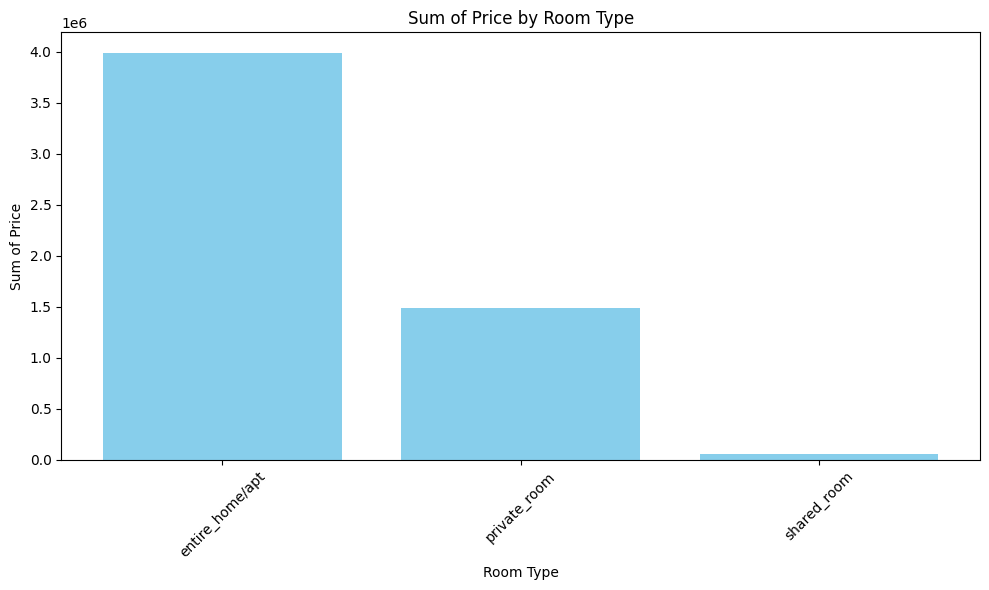

In [19]:
import matplotlib.pyplot as plt

# Agrupe o DataFrame por room_type e calcule a soma de price para cada grupo
grouped_data = df.groupby('room_type')['price'].sum()

# Extraia os nomes dos grupos e as somas de preço
room_types = grouped_data.index
sum_prices = grouped_data.values

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))
plt.bar(room_types, sum_prices, color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Sum of Price')
plt.title('Sum of Price by Room Type')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()


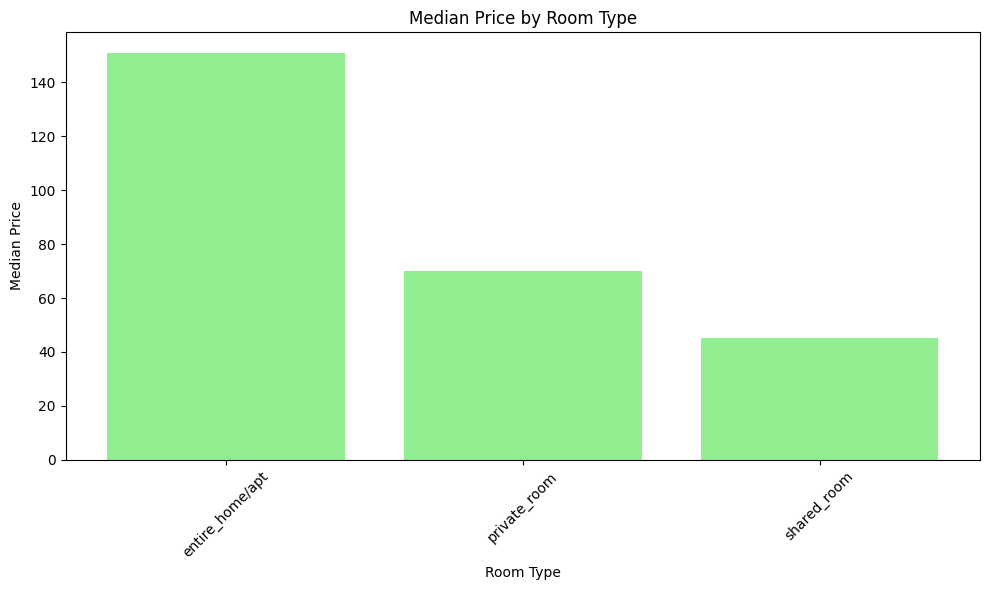

In [20]:
import matplotlib.pyplot as plt

# Agrupe o DataFrame por room_type e calcule a mediana de price para cada grupo
grouped_data = df.groupby('room_type')['price'].median()

# Extraia os nomes dos grupos e as medianas de preço
room_types = grouped_data.index
median_prices = grouped_data.values

# Crie o gráfico de colunas
plt.figure(figsize=(10, 6))
plt.bar(room_types, median_prices, color='lightgreen')
plt.xlabel('Room Type')
plt.ylabel('Median Price')
plt.title('Median Price by Room Type')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()


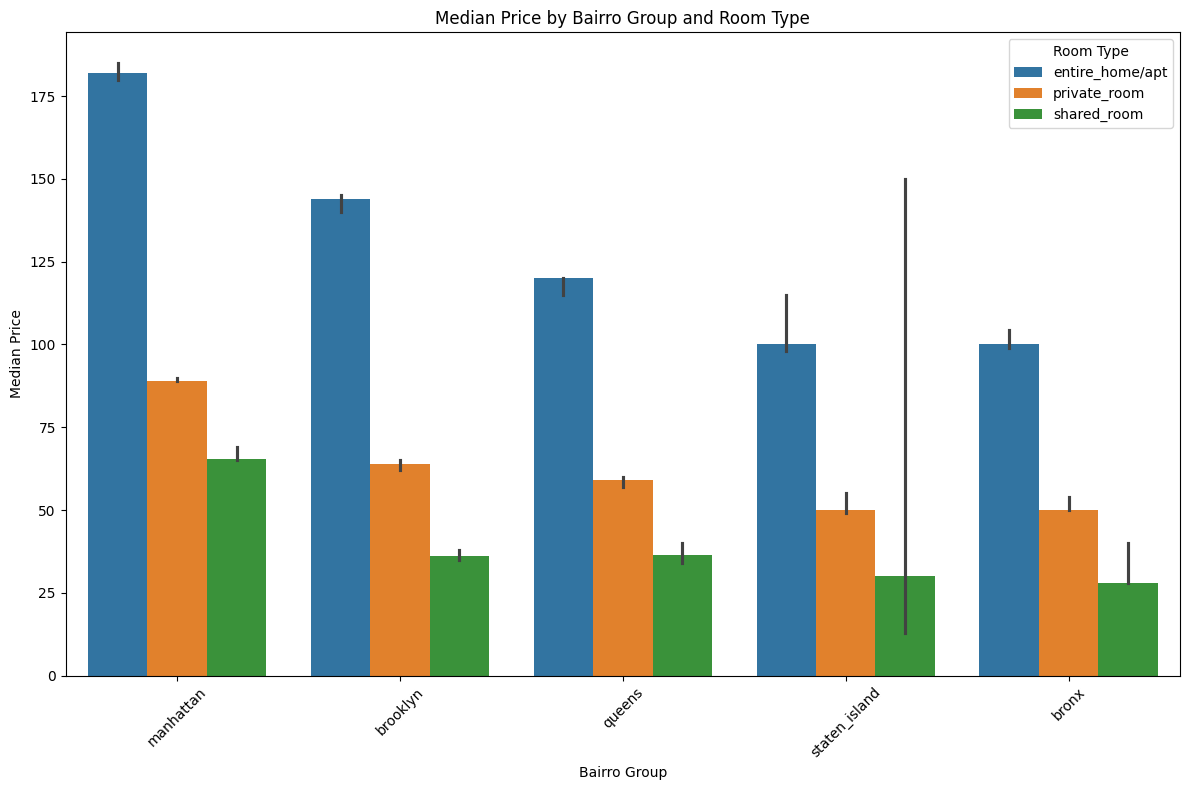

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a paleta de cores para os diferentes tipos de quarto (room_type)
palette = {'Entire home/apt': 'skyblue', 'Private room': 'lightgreen', 'Shared room': 'salmon'}

# Cria o gráfico de barras com as medianas dos preços para cada grupo de bairro e room_type
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='bairro_group', y='price', hue='room_type', estimator=np.median, palette='tab10')
plt.xlabel('Bairro Group')
plt.ylabel('Median Price')
plt.title('Median Price by Bairro Group and Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Room Type')
plt.show()


In [22]:
df

,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,manhattan,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
1,brooklyn,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
2,manhattan,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0
3,manhattan,40.74767,-73.97500,entire_home/apt,200,3,74,2019-06-22,0.59,1,129
4,brooklyn,40.68688,-73.95596,private_room,60,45,49,2017-10-05,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...
38805,manhattan,40.78099,-73.95366,private_room,129,1,1,2019-07-07,1.00,1,147
38806,queens,40.75104,-73.81459,private_room,45,1,1,2019-07-07,1.00,6,339
38807,staten_island,40.54179,-74.14275,private_room,235,1,1,2019-07-07,1.00,1,87
38808,bronx,40.80787,-73.92400,entire_home/apt,100,1,2,2019-07-07,2.00,1,40


<Axes: xlabel='price', ylabel='Count'>

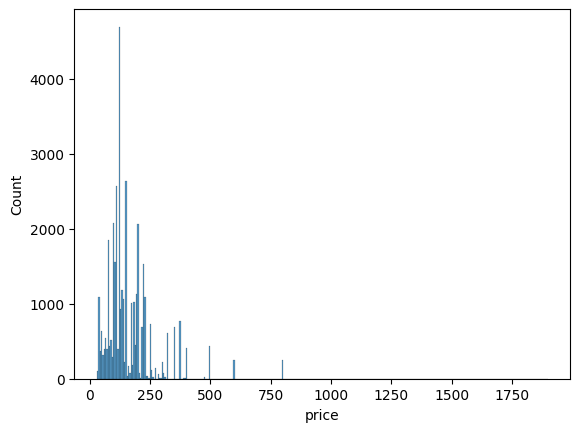

In [23]:
# Histograma da variável resposta
sns.histplot(df.price[df.price])

- É possível verificar que existe uma grande quantidade de outliers na variável price.
- Além disso, a distribuição de price de afasta da normal, exibindo uma assimetria a direita

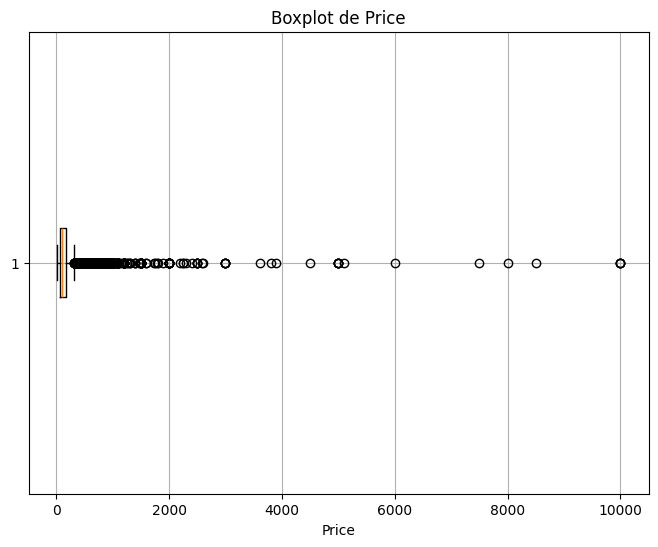

In [24]:
# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False)

plt.title('Boxplot de Price')
plt.xlabel('Price')
plt.grid(True)
plt.show()

- Vamos segmentar price segundo outras variáveis qualitativas. Dessa forma, podemos procurar por diferenças entre os grupos.

<Figure size 1000x600 with 0 Axes>

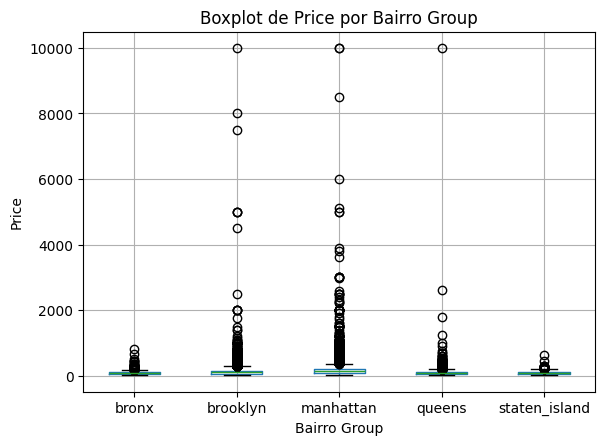

In [25]:
# Plotagem do boxplot
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='price', by='bairro_group')

# Removendo título padrão do boxplot
plt.suptitle('')

plt.title('Boxplot de Price por Bairro Group')
plt.xlabel('Bairro Group')
plt.ylabel('Price')
plt.grid(True)

# Definindo o limite no eixo Y

plt.show()

- Ao colocar um limite no eixo Y (até 2000) podemos visualizar que algumas caixinhas de boxplot para determinados grupos apresentam niveis mais altos.

<Figure size 1000x600 with 0 Axes>

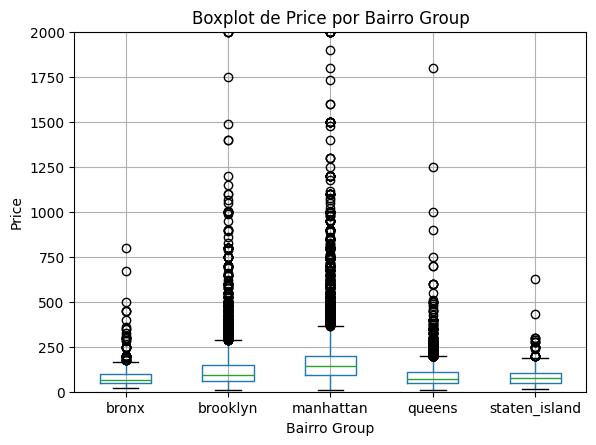

In [26]:
# Plotagem do boxplot
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='price', by='bairro_group')

# Removendo título padrão do boxplot
plt.suptitle('')

plt.title('Boxplot de Price por Bairro Group')
plt.xlabel('Bairro Group')
plt.ylabel('Price')
plt.grid(True)

# Definindo o limite no eixo Y
plt.ylim(0, 2000)

plt.show()

<Figure size 1000x600 with 0 Axes>

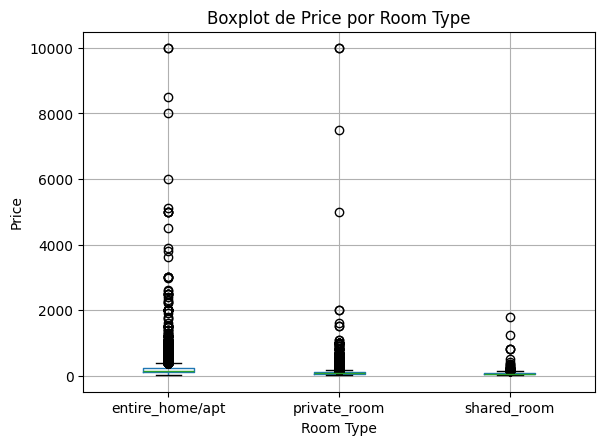

In [27]:
# Plotagem do boxplot
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='price', by='room_type')

# Removendo título padrão do boxplot
plt.suptitle('')

plt.title('Boxplot de Price por Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.grid(True)

plt.show()

- Ao limitar o eixo Y, percebemos que o primeiro grupo apresenta uma caixa mais elevada. Essas diferenças podem trazer valor para a análise

<Figure size 1000x600 with 0 Axes>

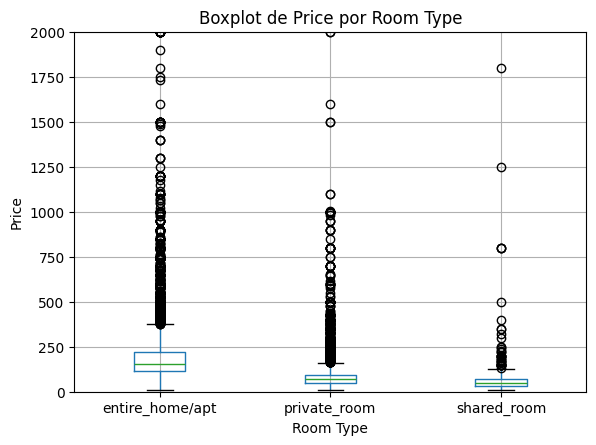

In [28]:
# Plotagem do boxplot
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column='price', by='room_type')

# Removendo título padrão do boxplot
plt.suptitle('')

plt.title('Boxplot de Price por Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.grid(True)

# Definindo o limite no eixo Y
plt.ylim(0, 2000)

plt.show()

- No dataframe é possível visualizar dados de longitude e latitude. Podemos pensar em construir um diagrama de dispersão e procurar por diferenças de densidade de pontos envolvendo a variável price
- A concentração de pontos indica uma maior quantidade de imóveis na região
- Existe uma região central no gráfico com valores mais elevados nos imóveis. Ou seja, a distribuição não parecer ser aleatória. Existe uma tendência de ter valores mais altos nessas regiões.
- Quanto maior os preços, maior o tamanho dos circulos

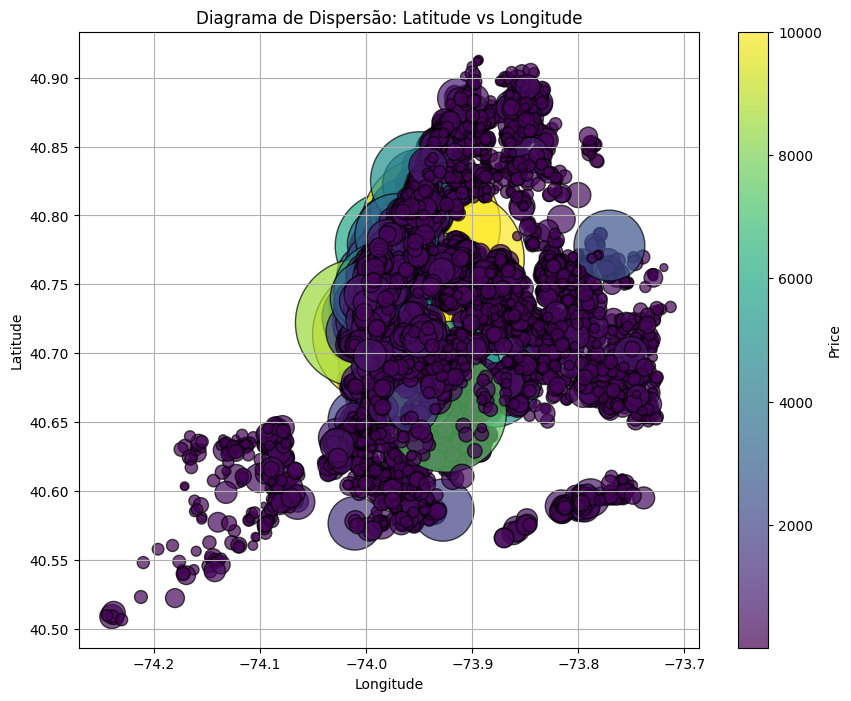

In [29]:
# Plotagem do diagrama de dispersão
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='viridis', s=df['price'], alpha=0.7, edgecolors='k')

plt.title('Diagrama de Dispersão: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price')
plt.grid(True)

plt.show()

- A quantidade de listagens por host tem uma relação geográfica. É possível visualizar uma concentração de valores altos em uma região específica.

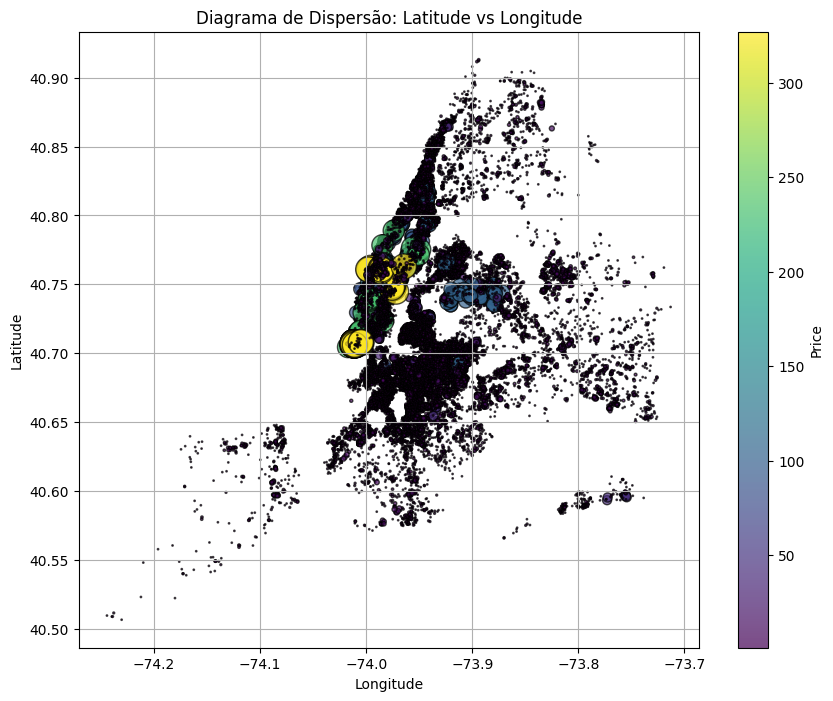

In [30]:
# Plotagem do diagrama de dispersão
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['calculado_host_listings_count'], cmap='viridis', s=df['calculado_host_listings_count'], alpha=0.7, edgecolors='k')

plt.title('Diagrama de Dispersão: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price')
plt.grid(True)

plt.show()

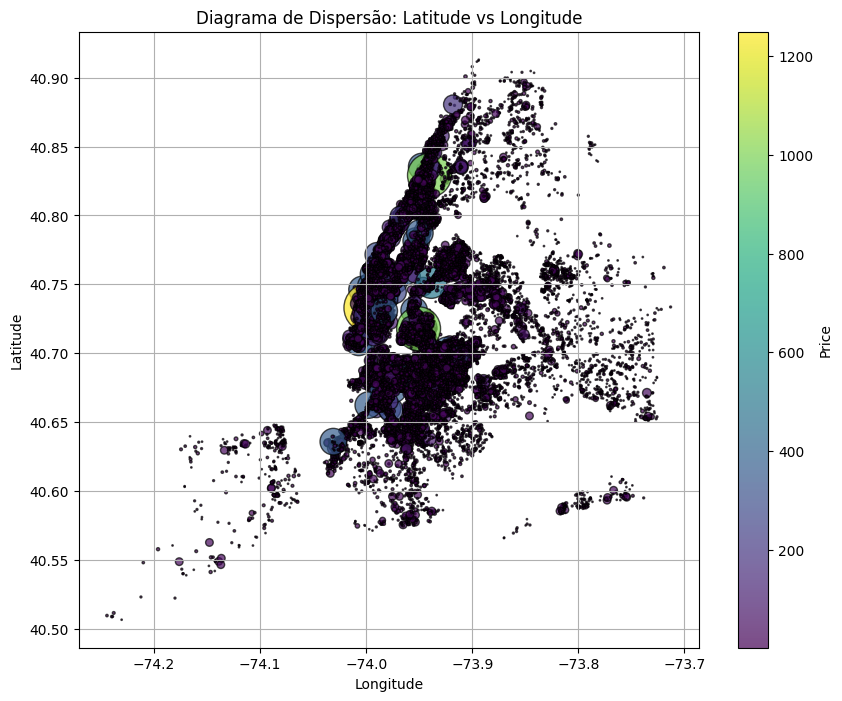

In [31]:
# Plotagem do diagrama de dispersão
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], c=df['minimo_noites'], cmap='viridis', s=df['minimo_noites'], alpha=0.7, edgecolors='k')

plt.title('Diagrama de Dispersão: Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price')
plt.grid(True)

plt.show()

- A priori, a coluna ultima_review não me parece interessante. Irei remover por enquanto

In [32]:
# Removendo coluna
df = df.drop('ultima_review', axis=1)

- Price: variabilidade grande. Repare que o desvio padrão é maior do que a média. Então, a média não é uma medida tão representativa. Os outliers impactam bastante essa medida de tendência central.

In [33]:
# Medidas Descritivas
df.describe()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,38810.000000,38810.000000,38810.000000,38810.000000,38810.000000,38810.000000,38810.000000,38810.000000
mean,40.728136,-73.951156,142.369029,5.868848,29.288611,1.373165,5.166735,114.875187
std,0.054992,0.046696,197.009418,17.390521,48.185164,1.680288,26.306665,129.530852
min,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,40.762997,-73.935030,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- Podemos pensar em remover alguns outliers da variável price.

In [34]:
# Contando a quantidade de linhas no DataFrame
df.shape[0]

38810

In [35]:
# Calculando o Q1 (primeiro quartil) e o Q3 (terceiro quartil)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculando o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definindo os limites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

In [36]:
# Contando a quantidade de linhas no DataFrame
df.shape[0]

36733

<Axes: xlabel='price', ylabel='Count'>

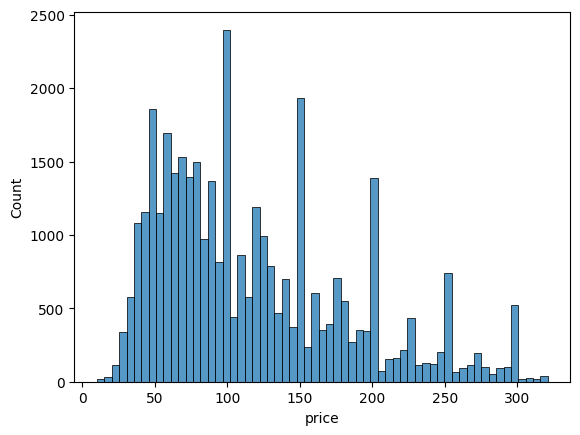

In [37]:
# Histigrama de price
sns.histplot(df['price'])

- No gráfico de minimo_noites é possível verificar uma preferência por uma menor quantidade de dias. Veja a distribuição de frequência no histograma a seguir. Existe uma assimetria a direita com uma concentração grande de valores em uma quantidade menor de dias
- No gráfico de latitude x longitude verificamos que em determinadas regiões as pessoas estão dispostas a reservarem mais dias
- Como os dados não são normalmente distribuídos, a regressão linear talvez não seja a mais adequada. Uma desvantagem em aplicar alguma transformação em Y pode ser enunciada a seguir. Se aplicarmos o logaritmo em y, poderiamos ter uma distribuição mais proxima da normal. Contudo, nossas previsões seriam em termos do (Log Y) e não em relação ao price. Além disso, não é posssível aplicar uma transformação inversa na previsão e esperar a mesma interpretação em termos de Y.

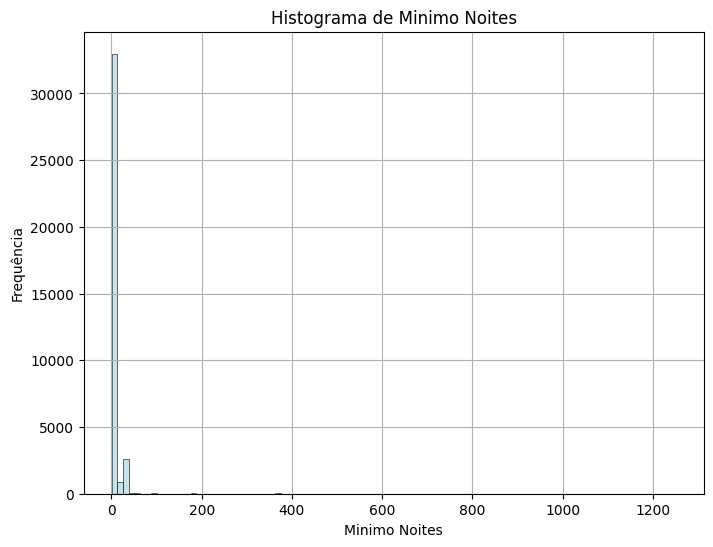

In [38]:
# Plotagem do histograma com seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df['minimo_noites'], bins=100, color='lightblue', edgecolor='black', alpha=0.7)

plt.title('Histograma de Minimo Noites')
plt.xlabel('Minimo Noites')
plt.ylabel('Frequência')
plt.grid(True)

# Definindo o limite no eixo Y
#plt.ylim(0, 20000)

plt.show()

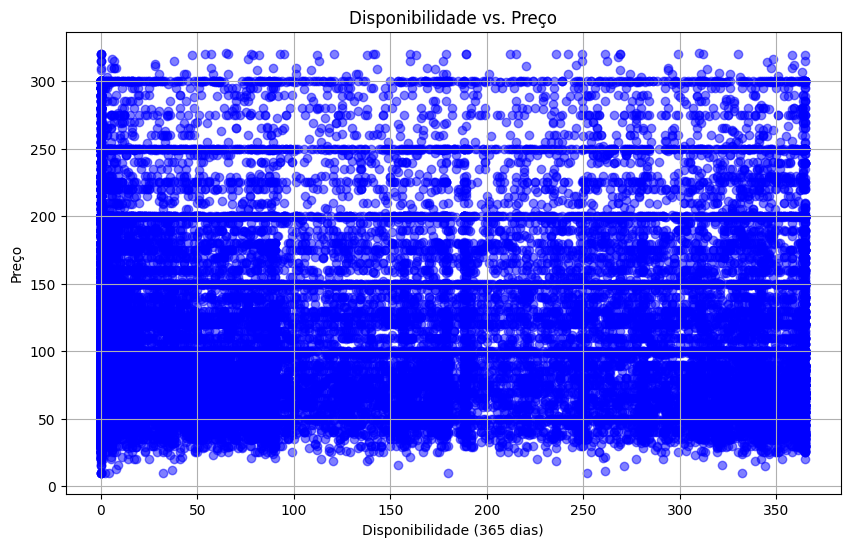

In [39]:
import matplotlib.pyplot as plt

# Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['disponibilidade_365'], df['price'], alpha=0.5, color='blue')
plt.title('Disponibilidade vs. Preço')
plt.xlabel('Disponibilidade (365 dias)')
plt.ylabel('Preço')
plt.grid(True)
plt.show()


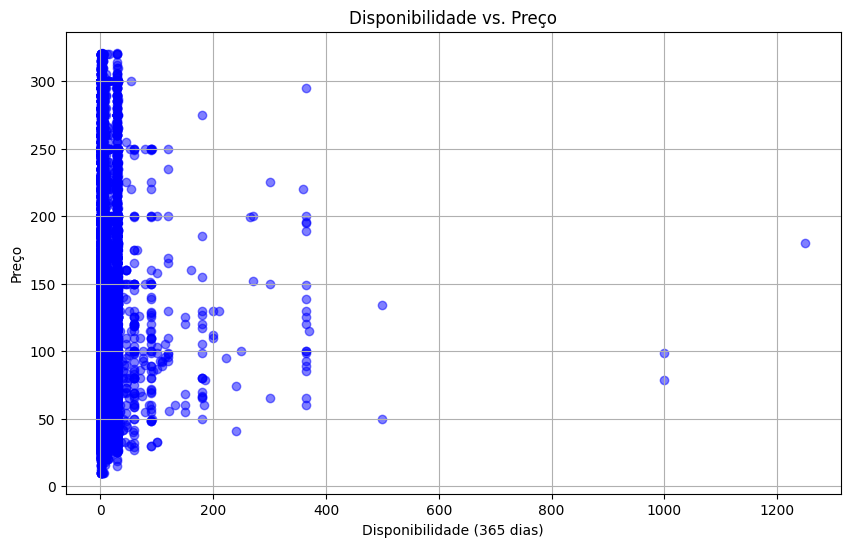

In [40]:
import matplotlib.pyplot as plt

# Cria o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['minimo_noites'], df['price'], alpha=0.5, color='blue')
plt.title('Disponibilidade vs. Preço')
plt.xlabel('Disponibilidade (365 dias)')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

- Perceba, no gráfico de dispersão a seguir, que não existe uma relação linear que faça sentido entre price e numero minimo de noites

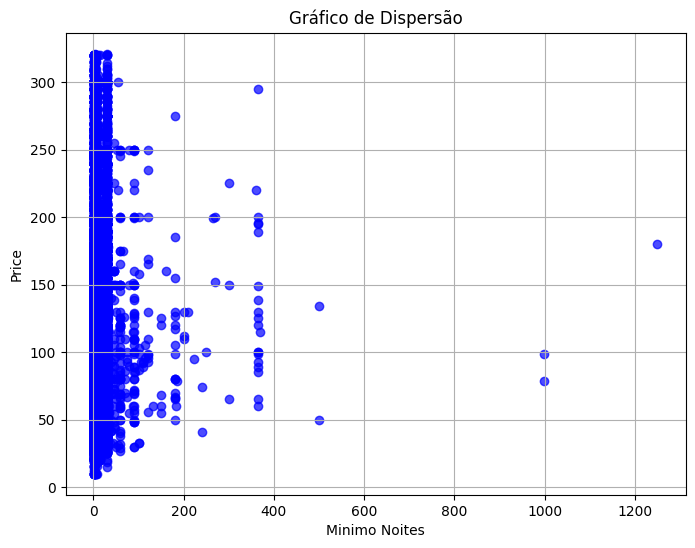

In [41]:
# Plotagem do gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['minimo_noites'], df['price'], color='blue', alpha=0.7)

plt.title('Gráfico de Dispersão')
plt.xlabel('Minimo Noites')
plt.ylabel('Price')
plt.grid(True)

plt.show()

- A seguir é possível visualizar o grau de associação linear entre as variáveis numéricas envolvidas no estudo

In [42]:
# Análise de correlação
matrix = df.select_dtypes(include=['int', 'float']).corr()
correlations = matrix['price'].abs().sort_values(ascending=False) # Correlações com a variável resposta 
correlations.sort_values(ascending=False).astype(float)

price                            1.000000
longitude                        0.305061
calculado_host_listings_count    0.125511
latitude                         0.055619
reviews_por_mes                  0.038546
disponibilidade_365              0.037964
minimo_noites                    0.019689
numero_de_reviews                0.018754
Name: price, dtype: float64

- Definindo um Ponto de corte para a correlação

In [43]:
# Define um limiar de correlação
threshold = 0.03

# Filtra as colunas com valores absolutos de correlação menores ou iguais ao limiar - objetivo dropar
significant_correlations = correlations[correlations.abs() <= threshold]

# Armazena as colunas em um objeto 
selected_num_columns = significant_correlations.index

# Exibe as colunas selecionadas
print(selected_num_columns)

Index(['minimo_noites', 'numero_de_reviews'], dtype='object')


In [44]:
# Removendo colunas com correlação baixa
df_2 = df.drop(columns=selected_num_columns,axis=1)

In [45]:
df_2.head(5)

,bairro_group,latitude,longitude,room_type,price,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,manhattan,40.75362,-73.98377,entire_home/apt,225,0.38,2,355
1,brooklyn,40.68514,-73.95976,entire_home/apt,89,4.64,1,194
2,manhattan,40.79851,-73.94399,entire_home/apt,80,0.10,1,0
3,manhattan,40.74767,-73.97500,entire_home/apt,200,0.59,1,129
4,brooklyn,40.68688,-73.95596,private_room,60,0.40,1,0


# Lidando com variável qualitativa

- Aplicando o get dummies. Cria colunas dicotômicas com valores 0 e 1

In [46]:
# Colunas categóricas
object_columns = df_2.select_dtypes(include=['object']).columns.tolist()

# Criando as dummies
df_2 = pd.get_dummies(df_2, columns=object_columns,drop_first=True)
df_2

,latitude,longitude,price,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_brooklyn,bairro_group_manhattan,bairro_group_queens,bairro_group_staten_island,room_type_private_room,room_type_shared_room
0,40.75362,-73.98377,225,0.38,2,355,False,True,False,False,False,False
1,40.68514,-73.95976,89,4.64,1,194,True,False,False,False,False,False
2,40.79851,-73.94399,80,0.10,1,0,False,True,False,False,False,False
3,40.74767,-73.97500,200,0.59,1,129,False,True,False,False,False,False
4,40.68688,-73.95596,60,0.40,1,0,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
38805,40.78099,-73.95366,129,1.00,1,147,False,True,False,False,True,False
38806,40.75104,-73.81459,45,1.00,6,339,False,False,True,False,True,False
38807,40.54179,-74.14275,235,1.00,1,87,False,False,False,True,True,False
38808,40.80787,-73.92400,100,2.00,1,40,False,False,False,False,False,False


In [47]:
# Convertendo True e False nas categoricas em 0 e 1
df_2 = df_2.replace({False: 0, True: 1})
df_2

,latitude,longitude,price,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_brooklyn,bairro_group_manhattan,bairro_group_queens,bairro_group_staten_island,room_type_private_room,room_type_shared_room
0,40.75362,-73.98377,225,0.38,2,355,0,1,0,0,0,0
1,40.68514,-73.95976,89,4.64,1,194,1,0,0,0,0,0
2,40.79851,-73.94399,80,0.10,1,0,0,1,0,0,0,0
3,40.74767,-73.97500,200,0.59,1,129,0,1,0,0,0,0
4,40.68688,-73.95596,60,0.40,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38805,40.78099,-73.95366,129,1.00,1,147,0,1,0,0,1,0
38806,40.75104,-73.81459,45,1.00,6,339,0,0,1,0,1,0
38807,40.54179,-74.14275,235,1.00,1,87,0,0,0,1,1,0
38808,40.80787,-73.92400,100,2.00,1,40,0,0,0,0,0,0


# Dados de Treino e Teste

- Dividindo os dados em treino e teste

In [48]:
from sklearn.model_selection import train_test_split

- Separando features da variável resposta

In [49]:
X = df_2.drop(columns=['price'])  # Remover a coluna 'Y' para obter as features
Y = df_2['price']  # Extrair a coluna 'Y' como a variável de resposta

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


- Normalizando os dados para evitar problemas relacionado a escala das variáveis
- É importante separar treino e teste antes de normalizar para não trazer informações do treino nos dados de teste

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Instanciar o objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a escala Min-Max nos conjuntos de treinamento e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar DataFrames a partir dos conjuntos de dados escalados mantendo os nomes das colunas
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [51]:
import statsmodels.api as sm

In [52]:
# Adicionar uma constante aos conjuntos de treinamento e teste escalados
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [53]:
X_train.head(5)

,const,latitude,longitude,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_brooklyn,bairro_group_manhattan,bairro_group_queens,bairro_group_staten_island,room_type_private_room,room_type_shared_room
0,1.0,0.594811,0.489907,0.130792,0.01227,0.786301,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.522513,0.472979,0.001710,0.00000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.592008,0.634840,0.000513,0.00000,0.997260,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.449281,0.625757,0.115917,0.00000,0.142466,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.506283,0.536943,0.001026,0.00000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0


In [54]:
y_train.head(5)

37361    100
18539     99
9196      75
19918     89
11291     50
Name: price, dtype: int64

In [55]:
# Trabalhando em cima dos índices
y_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

- Ajustando o Modelo
- É possível verificar uma variável não significativa. Vamos remove-la


In [56]:
# Ajustar o modelo de regressão usando OLS nos dados de treinamento
model = sm.OLS(y_train, X_train).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2526.
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:58:29   Log-Likelihood:            -1.5456e+05
No. Observations:               29386   AIC:                         3.092e+05
Df Residuals:                   29374   BIC:                         3.093e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

- Identificando os valores-p maiores do que 0.05

In [57]:
# Ajuste o modelo de regressão
model = sm.OLS(y_train, X_train).fit()

# Obtenha os resultados da regressão
results = model.summary()

# Obtenha os valores de p-valor
p_values = model.pvalues

# Crie um DataFrame com o nome das variáveis e os valores de p-valor
p_values_df = pd.DataFrame({'Variable': p_values.index, 'P-Value': p_values.values}).sort_values(by='P-Value', ascending=False)
p_values_df = p_values_df[p_values_df['P-Value']>=0.05]

# Exiba o DataFrame
print(p_values_df)

          Variable   P-Value
3  reviews_por_mes  0.124767


- Ajustando modelo final apenas com variávels significativas

In [58]:
while len(p_values_df)>0:

    max_p_variable = p_values_df.loc[p_values_df['P-Value'].idxmax()]['Variable']

    X_train = X_train.drop(columns=max_p_variable,axis=1)

    # Ajuste o modelo de regressão
    model = sm.OLS(y_train, X_train).fit()
    results = model.summary()


    # Obtenha os valores de p-valor
    p_values = model.pvalues

    # Crie um DataFrame com o nome das variáveis e os valores de p-valor
    p_values_df = pd.DataFrame({'Variable': p_values.index, 'P-Value': p_values.values}).sort_values(by='P-Value', ascending=False)
    p_values_df = p_values_df[p_values_df['P-Value']>=0.05]
    
    # Exiba o DataFrame
    print(len(p_values_df))
    
results

0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2778.
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:58:29   Log-Likelihood:            -1.5457e+05
No. Observations:               29386   AIC:                         3.092e+05
Df Residuals:                   29375   BIC:                         3.092e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           241.1289      4.231     56.989      0.000     232.836     249.422
latitude                        -27.5299      3.312     -8.312      0.000     -34.021     -21.038
longitude                      -149.2557      4.859    -30.717      0.000    -158.780    -139.732
calculado_host_listings_count    22.6908      3.745      6.060      0.000      15.351      30.031
disponibilidade_365              18.0479      0.801     22.535      0.000      16.478      19.618
bairro_group_brooklyn            -6.4719      2.285     -2.832      0.005     -10.951      -1.993
bairro_group_manhattan           21.5559      2.067     10.429      0.000      17.505      25.607
bairro_group_queens               7.2556      2.196      3.305      0.001       2.952      11.559
bairro_group_staten_island      -79.2268      4.227    -18.741      0.000     -87.513     -70.941
room_type_private_room          -73.3307      0.562   -130.463      0.000     -74.432     -72.229
room_type_shared_room          -100.6976      1.838    -54.782      0.000    -104.301     -97.095
==============================================================================
Omnibus:                     4467.738   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8073.888
Skew:                           0.979   Prob(JB):                         0.00
Kurtosis:                       4.660   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Modelo final
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     2778.
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:58:29   Log-Likelihood:            -1.5457e+05
No. Observations:               29386   AIC:                         3.092e+05
Df Residuals:                   29375   BIC:                         3.092e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           241.1289      4.231     56.989      0.000     232.836     249.422
latitude                        -27.5299      3.312     -8.312      0.000     -34.021     -21.038
longitude                      -149.2557      4.859    -30.717      0.000    -158.780    -139.732
calculado_host_listings_count    22.6908      3.745      6.060      0.000      15.351      30.031
disponibilidade_365              18.0479      0.801     22.535      0.000      16.478      19.618
bairro_group_brooklyn            -6.4719      2.285     -2.832      0.005     -10.951      -1.993
bairro_group_manhattan           21.5559      2.067     10.429      0.000      17.505      25.607
bairro_group_queens               7.2556      2.196      3.305      0.001       2.952      11.559
bairro_group_staten_island      -79.2268      4.227    -18.741      0.000     -87.513     -70.941
room_type_private_room          -73.3307      0.562   -130.463      0.000     -74.432     -72.229
room_type_shared_room          -100.6976      1.838    -54.782      0.000    -104.301     -97.095
==============================================================================
Omnibus:                     4467.738   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8073.888
Skew:                           0.979   Prob(JB):                         0.00
Kurtosis:                       4.660   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Ajustando dados de teste
- Avaliando as métricas

- Filtrando as mesmas variáveis dos dados de treino no dados de teste

In [60]:
# Lista de variáveis presentes em X_treino
variaveis_treino = X_train.columns

# Filtrar as colunas de X_teste para incluir apenas as variáveis presentes em X_treino
X_teste_filtrado = X_test[variaveis_treino]

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
# Fazer previsões nos dados de teste
predictions = model.predict(X_teste_filtrado)

# Avaliar o modelo, por exemplo, calcular o R-quadrado
r_squared = model.rsquared
print("R-squared:", r_squared)

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

R-squared: 0.4860802668053755
RMSE: 46.46313999503537
Mean Squared Error: 2158.8233781982553


# Previsão dos Novos Casos

In [63]:
nova_obs = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

colunas_min_max = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

for coluna, valor in nova_obs.items():
    if coluna in colunas_min_max:
        minimo = np.max(df[coluna])
        maximo = np.min(df[coluna])

        nova_obs[coluna] = (valor - minimo)/(maximo-minimo) # Aplicando a transformação nos novos dados

# 0,1,0,0,0,0 é referente aos dados do bairro: so temos 'Manhattan' de dummy, então assume o valor 1, as demais, ZERO
caracteristicas = [1,nova_obs['latitude'],nova_obs['longitude'],nova_obs['calculado_host_listings_count'],nova_obs['disponibilidade_365'],0,1,0,0,0,0]

In [64]:
# Dados Transformados por Min MAX
caracteristicas

[1,
 0.3920816426902839,
 0.5095308883578306,
 0.9969325153374233,
 0.0273972602739726,
 0,
 1,
 0,
 0,
 0,
 0]

In [65]:
# Previsão
preco_predito = model.predict([caracteristicas])


print(f'Preço predito para a nova observação: {preco_predito}')

Preço predito para a nova observação: [198.95614308]


# Random Forest
- https://www.geeksforgeeks.org/random-forest-regression-in-python/
- Como mencionado antes, talvez a regressão normal não seja tão interessante pela falta de normalidade dos dados e aplicar uma transformação não me parece ser o foco do estudo, uma vez que é pedido a previsão do preço
- Vamos considerar uma outra abordagem para precificação - Utilizar o Random Forest para tarefas de regressão

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [67]:
# Defina os parâmetros que deseja testar
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Crie o objeto do regressor RandomForestRegressor
regressor = RandomForestRegressor(random_state=0, oob_score=True)

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Ajuste o GridSearchCV aos dados de treino
grid_search.fit(X_train, y_train)

# Imprima os melhores parâmetros encontrados
print("Melhores parâmetros:", grid_search.best_params_)

# Imprima a pontuação do melhor modelo
print("Melhor pontuação (MSE):", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END max_depth=None, min_sample

In [68]:
# Obtenha as colunas presentes em X_treino
colunas_treino = X_train.columns

# Filtre as colunas em X_teste
X_teste_filtrado = X_test[colunas_treino]

In [69]:
# Usando os melhores parâmetros encontrados para ajustar o modelo
melhores_parametros = grid_search.best_params_
regressor_final = RandomForestRegressor(n_estimators=melhores_parametros['n_estimators'],
                                         max_depth=melhores_parametros['max_depth'],
                                         min_samples_split=melhores_parametros['min_samples_split'],
                                         random_state=0, oob_score=True)

# Ajuste o modelo aos dados de treino com os melhores parâmetros
regressor_final.fit(X_train, y_train)

# Faça previsões usando o modelo ajustado
predictions = regressor_final.predict(X_teste_filtrado)

In [70]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
 
# Making predictions on the same data or new data
predictions = regressor_final.predict(X_teste_filtrado)
 
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

Mean Squared Error: 1874.1745365137156
R-squared: 0.5607986895797068
RMSE: 43.29173750860221


In [95]:
caracteristicas

[1,
 0.3920816426902839,
 0.5095308883578306,
 0.9969325153374233,
 0.0273972602739726,
 0,
 1,
 0,
 0,
 0,
 0]

In [89]:
# Previsão
preco_predito = regressor_final.predict([caracteristicas])

print(f'Preço predito para a nova observação: {preco_predito}')

Preço predito para a nova observação: [162.36407789]


- O modelo de regressão linear múltipla tem alguns problemas conceituais. Além disso, o Pseudo-R^2 deu 0,48 em comparação com o Pseudo R^2 do Random Forest que deu 0.68. Os valores de RMSE também foram menores mostrando que o random Forest para tarefas de regressão se mostrou superior.

# Salvando o modelo em PKL

- Random Forest Regressor

In [90]:
#adicionando o modelo de machine learning em um arquivo pkl
import pickle

with open("regressor_final.pkl", "wb") as f:
    pickle.dump(model, f)

print("Algoritmo random forest regressor salvo com sucesso em regressor_final.pkl")

Algoritmo random forest regressor salvo com sucesso em regressor_final.pkl


# Respondendo Questões do case

Questão 1.	Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

A variável resposta price apresentam uma grande assimetria a direita e não é normalmente distribuída. Isso dificulta a aplicação do modelo de regressão linear múltipla com suposição de normalidade. Então uma alternativa possível foi utilizar o random forest. 

É observado também uma grande quantidade de outliers na variável resposta. Optamos por remove-lo a fim de reduzir os impactos no processo de estimação dos parâmetros.

A partir de boxplot verificamos que algumas variáveis categóricas como: Bairro Group e Room Type apresentam caixas em níveis diferentes. Esses indícios sugerem que a distribuição dos preços podem ser diferentes para os grupos dessas variáveis.

Verificamos também uma certa dependência espacial/geografica com algumas variáveis. Para tanto, costruímos um gráfico de dispersão entre latitute e longitude. O resultado mostra que valores altos de price ocorrem com maior frequência nas regiões centrais de latitude e longitude. Verificamos uma distribuição espacial similar para a variável  calculado_host_listings_count (um pouco distribuida centro-esquerda). A variável minimo_noites é tem comportamento similar.

Verificamos correlações baixas com a variável price.Isso também dificulta o uso do modelo Normal. Por isso optamos pelo random forest.

Verificamos uma grande preferencia por pessoas a passarem um numero me de noites no imóvel.

Questão 2.	Responda também às seguintes perguntas:

a.	Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Realizamos uma análise gráfica para examinar os imóveis com as maiores medianas de preço, dividindo a análise por bairros e tipos de quartos. Os resultados revelam que o maior retorno é observado em Manhattan, especialmente para imóveis do tipo "entire home/apt".

b.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Observand o diagrama de dispersão entre essas duas variáveis e preço, podemos dizer que não existe uma relação linear entre elas e preço. Contudo, para valores altos de disponibilidade não pe possível verificar um preço muito alto. Ou seja, disponibilidade alta tende a ter um preço mais baixo.


c.	Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Não




Questão 3.	Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

O projeto aborda uma tarefa de regressão, onde inicialmente buscou-se verificar a suposição de normalidade nos dados, a qual não foi atendida. Diante disso, optou-se por empregar o regressor Random Forest para a modelagem de regressão. Foram utilizadas métricas como RMSE, MSE e Pseudo-R^2 para comparar o desempenho dos modelos de regressão linear múltipla e Random Forest.

As variáveis escolhidas para o modelo foram: latitude, longitude, calculado_host_listings_count, disponibilidade_365, bairro_group e room_type. Essa seleção considerou uma análise inicial de possíveis diferenças entre os níveis dos grupos em uma visualização de boxplot para as variáveis qualitativas, e para as quantitativas, um ponto de corte com base na correlação. Primeiramente, ajustou-se um modelo de regressão para identificar as variáveis significantes, as quais foram então utilizadas no Random Forest Regressor para comparação.

Para o tratamento inicial dos dados, foram removidos os valores ausentes (NA's), padronizados os dados qualitativos para evitar discrepâncias de ortografia nos textos referentes aos mesmos grupos, construídas variáveis dummy, removidos outliers e normalizados os dados numéricos (exceto a variável dependente) para evitar influências devido às diferentes escalas das variáveis.

Os conjuntos de treino e teste foram construídos, e os modelos OLS e Random Forest foram aplicados. Notou-se que o OLS apresentou limitações devido à falta de normalidade e à baixa correlação linear entre as variáveis numéricas e o preço.

Por outro lado, a principal vantagem do uso do Random Forest é sua capacidade de não fazer suposições quanto à distribuição da variável resposta. Além disso, fiz um grid search para a random forest a fim de selecionar os melhores parâmetros

Por fim, obteve-se um RMSE menor para a Random Forest, indicando uma boa capacidade de explicação da variabilidade dos dados.








Questão 4.	Supondo um apartamento com as seguintes características:

Fizemos as previsões com os Dois modelos. Contudo, irei apresentar os resultados para o modelo final. Random Forest Regressor:

Preço predito para a nova observação: [162.36407789]

# Abrindo o PKL

In [79]:
# Previsão
modelo_carregado.predict([caracteristicas])

array([198.95614308])